In [ ]:
# IMPORTACIONES BÁSICAS Y MANEJO DE DATOS
# =============================================================================
import os  # Para operaciones del sistema de archivos y manejo de rutas
import numpy as np  # Para operaciones numéricas con arrays multidimensionales
import matplotlib.pyplot as plt  # Para visualización de datos y gráficos

# =============================================================================
# TENSORFLOW/KERAS - COMPONENTES PRINCIPALES
# =============================================================================
import tensorflow as tf  # Framework principal para deep learning
from tensorflow import keras  # API de alto nivel para construir modelos
from tensorflow.keras import layers  # Todas las capas de redes neuronales

# =============================================================================
# PREPROCESAMIENTO DE IMÁGENES Y AUMENTO DE DATOS
# =============================================================================
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Para data augmentation
from tensorflow.keras.utils import load_img, img_to_array  # Para carga y conversión de imágenes
from PIL import Image  # Para manipulación básica de imágenes
import cv2  # OpenCV para procesamiento avanzado de imágenes

# =============================================================================
# ARQUITECTURAS DE MODELOS Y CAPAS ESPECÍFICAS
# =============================================================================
from tensorflow.keras.models import Sequential, Model  # Para modelos secuenciales y funcionales
from tensorflow.keras.layers import (Dense, Flatten, Dropout,
                                   BatchNormalization, Conv2D,
                                   MaxPooling2D)  # Capas comunes

# =============================================================================
# TRANSFER LEARNING Y MODELOS PRETRAINED
# =============================================================================
from tensorflow.keras.applications import MobileNetV2  # Modelo preentrenado para visión por computadora

# =============================================================================
# OPTIMIZACIÓN Y ENTRENAMIENTO
# =============================================================================
from tensorflow.keras.optimizers import Adam  # Optimizador Adam (combinación de RMSprop y Momentum)
from tensorflow.keras.callbacks import EarlyStopping  # Para detener entrenamiento temprano si no hay mejora

# =============================================================================
# EVALUACIÓN Y MÉTRICAS
# =============================================================================
from sklearn.model_selection import train_test_split  # Para dividir datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Para evaluación de resultados

In [ ]:
from google.colab import drive

#Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_images_from_folder(folder, target_size=(64, 64)):
    # Inicialización de contenedores para datos
    images = []  # Lista para almacenar arrays de imágenes (features)
    labels = []  # Lista para almacenar etiquetas numéricas (targets)

    # 1. PREPARACIÓN DEL MAPEO DE ETIQUETAS
    # Obtiene y ordena los nombres de subcarpetas (clases) para consistencia
    subfolders = sorted(os.listdir(folder))  # sorted() asegura orden consistente

    # Crea diccionario de mapeo: {nombre_subcarpeta: etiqueta_numerica}
    # Ej: {'perros':0, 'gatos':1} manteniendo el orden alfabético
    label_mapping = {subfolder: label for label, subfolder in enumerate(subfolders)}

    # 2. CARGA Y PREPROCESAMIENTO DE IMÁGENES
    for subfolder in subfolders:  # Procesa cada categoría/clase
        subfolder_path = os.path.join(folder, subfolder)

        # Verifica que sea directorio (ignora archivos sueltos)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)

                try:
                    # 2.1. CARGA Y CONVERSIÓN DE IMAGEN
                    img = Image.open(img_path).convert('RGB')  # Fuerza formato RGB (3 canales)

                    # 2.2. PREPROCESAMIENTO BÁSICO
                    img = img.resize(target_size)  # Redimensionamiento uniforme

                    # 2.3. ALMACENAMIENTO
                    images.append(np.array(img))  # Convierte a array numpy
                    labels.append(label_mapping[subfolder])  # Asigna etiqueta numérica

                except Exception as e:
                    # Manejo elegante de errores (imágenes corruptas o no legibles)
                    print(f"Error loading image {img_path}: {e}")

    # 3. POST-PROCESAMIENTO Y RETORNO
    # Calcula el número real de clases encontradas
    num_classes = len(label_mapping)  # Útil para la capa final del modelo

    # Conversión a arrays numpy para compatibilidad con TensorFlow/Keras
    return np.array(images), np.array(labels), num_classes

In [ ]:
#data_folder = "/content/drive/MyDrive/PRACTICAS LAVADO DE MANOS/Frames/Step1"
data_folder = "/content/drive/MyDrive/PRACTICAS LAVADO DE MANOS/Frames 2/Frames"
X, y, num_classes = load_images_from_folder(data_folder)  # Get num_classes
X = X / 255.0  # Normalización de imágenes


# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(num_classes)

Error loading image /content/drive/MyDrive/PRACTICAS LAVADO DE MANOS/Frames 2/Frames/Step2/step204: [Errno 21] Is a directory: '/content/drive/MyDrive/PRACTICAS LAVADO DE MANOS/Frames 2/Frames/Step2/step204'
Error loading image /content/drive/MyDrive/PRACTICAS LAVADO DE MANOS/Frames 2/Frames/Step2/step205: [Errno 21] Is a directory: '/content/drive/MyDrive/PRACTICAS LAVADO DE MANOS/Frames 2/Frames/Step2/step205'
Error loading image /content/drive/MyDrive/PRACTICAS LAVADO DE MANOS/Frames 2/Frames/Step2/step206: [Errno 21] Is a directory: '/content/drive/MyDrive/PRACTICAS LAVADO DE MANOS/Frames 2/Frames/Step2/step206'
Error loading image /content/drive/MyDrive/PRACTICAS LAVADO DE MANOS/Frames 2/Frames/Step2/step207: [Errno 21] Is a directory: '/content/drive/MyDrive/PRACTICAS LAVADO DE MANOS/Frames 2/Frames/Step2/step207'
Error loading image /content/drive/MyDrive/PRACTICAS LAVADO DE MANOS/Frames 2/Frames/Step2/step216: [Errno 21] Is a directory: '/content/drive/MyDrive/PRACTICAS LAVADO 

In [ ]:
# Definición de un modelo secuencial (capas apiladas linealmente)
model = tf.keras.models.Sequential([
    # Capa de entrada - especifica la forma de los datos de entrada (imágenes 64x64 RGB)
    tf.keras.layers.Input(shape=(64, 64, 3)),  # Formato: (alto, ancho, canales)

    # =============================================
    # BLOQUE CONVOLUCIONAL 1
    # =============================================
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    # - 32 filtros/kernels de 3x3
    # - Activación ReLU para no-linealidad
    # - Padding 'same' mantiene dimensiones espaciales

    tf.keras.layers.BatchNormalization(),  # Normaliza las activaciones para estabilizar entrenamiento
    tf.keras.layers.Dropout(0.2),  # Regularización: desactiva aleatoriamente 20% de neuronas
    # Capa MaxPooling comentada (podría añadirse para reducir dimensionalidad)

    # =============================================
    # BLOQUE CONVOLUCIONAL 2
    # =============================================
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # 64 filtros
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    # MaxPooling comentado en este bloque también

    # =============================================
    # BLOQUE CONVOLUCIONAL 3
    # =============================================
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  # 128 filtros
    # BatchNormalization comentado en este bloque
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Reducción dimensional (submuestreo)
    # Reduce el tamaño espacial a la mitad (32x32)

    # =============================================
    # TRANSICIÓN A CAPAS DENSAS
    # =============================================
    tf.keras.layers.Flatten(),  # "Aplana" los mapas de características a 1D

    # =============================================
    # BLOQUE DENSO 1
    # =============================================
    tf.keras.layers.Dense(256, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    # - 256 neuronas
    # - Regularización L2 (penaliza pesos grandes con λ=0.001)

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),  # ReLU explícita (mejor control)
    tf.keras.layers.Dropout(0.3),  # Mayor dropout en capas densas (30%)

    # =============================================
    # BLOQUE DENSO 2
    # =============================================
    tf.keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # 128 neuronas
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),

    # =============================================
    # CAPA DE SALIDA
    # =============================================
    tf.keras.layers.Dense(num_classes, activation='linear')  # IMPORTANTE: Usar num_classes definido previamente
    # Activación lineal (útil para luego aplicar softmax o sigmoid según el caso)
])

In [ ]:
# Definición de la función de pérdida (loss function)
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Compilación del modelo con configuración de entrenamiento
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Optimizador Adam con tasa de aprendizaje 0.001
    loss=loss_function,                  # Función de pérdida definida anteriormente
    metrics=['accuracy']                 # Métrica a monitorear durante el entrenamiento
)

In [ ]:
# Configuración de Early Stopping para evitar sobreentrenamiento
early_stopping = EarlyStopping(
    patience=5,                # Número de épocas sin mejora antes de detener el entrenamiento
    monitor='val_loss',        # Métrica a monitorear (pérdida en conjunto de validación)
    restore_best_weights=True, # Restaura los pesos del modelo con mejor val_loss
    verbose=1                  # Muestra mensajes cuando se detiene el entrenamiento
)

# Ejecución del entrenamiento del modelo
history = model.fit(
    x=X_train,                     # Datos de entrenamiento (features)
    y=y_train,                     # Etiquetas de entrenamiento (labels)
    validation_data=(X_test, y_test), # Datos para validación (test set en este caso)
    epochs=150,                    # Número máximo de épocas de entrenamiento
    # callbacks=[early_stopping]    # EarlyStopping está definido pero no se está usando actualmente
                                   # (debería descomentarse para activarlo)
)

Epoch 1/150
496/496 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 0.8501 - loss: 1.5882 - val_accuracy: 0.6755 - val_loss: 1.3015
Epoch 2/150
496/496 ━━━━━━━━━━━━━━━━━━━━ 19s 36ms/step - accuracy: 0.9393 - loss: 0.7162 - val_accuracy: 0.9120 - val_loss: 0.7230
Epoch 3/150
496/496 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9454 - loss: 0.6573 - val_accuracy: 0.9047 - val_loss: 0.6479
Epoch 4/150
496/496 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9547 - loss: 0.5157 - val_accuracy: 0.9216 - val_loss: 0.5580
Epoch 5/150
496/496 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9541 - loss: 0.4888 - val_accuracy: 0.9574 - val_loss: 0.3713
Epoch 6/150
496/496 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9569 - loss: 0.3790 - val_accuracy: 0.9175 - val_loss: 0.4224
Epoch 7/150
496/496 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9575 - loss: 0.3461 - val_accuracy: 0.9506 - val_loss: 0.3812
Epoch 8/150
496/496 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9644 - loss: 0

In [ ]:
# Guardar el modelo entrenado
model.save("prueba 3 de modelo.h5")

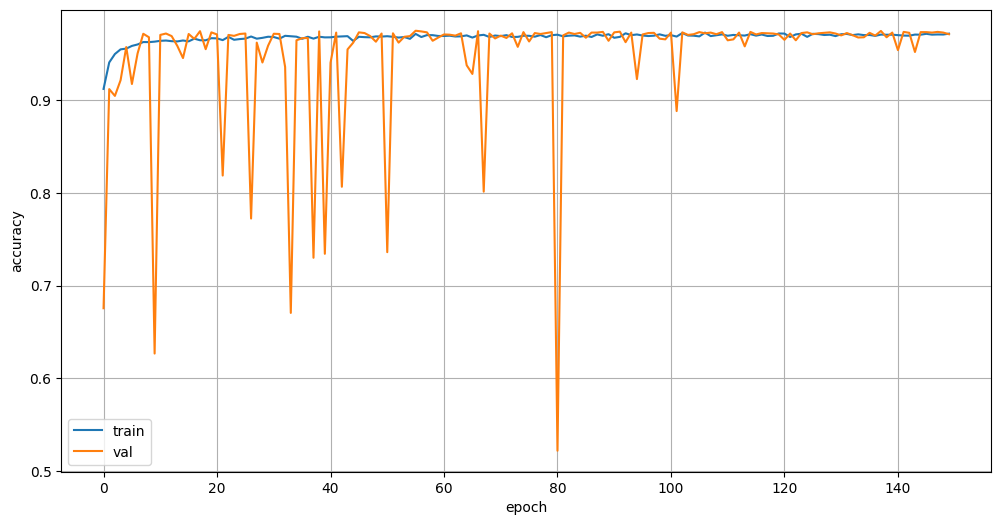

In [ ]:
# Plot validation and testing accuracy
plt.figure(figsize=(12,6)) # Se establece el tamaño de la gráfica.
plt.plot(history.history['accuracy']) # Se gráfica la exactitud del modelo a través de las épocas.
plt.plot(history.history['val_accuracy']) # Se gráfica la exactitud del modelo con los datos de validación del entrenamiento a través de las épocas.
plt.xlabel('epoch') # El eje x corresponde a las épocas.
plt.ylabel('accuracy') # El eje y corresponde a las exactitud.
plt.legend(['train', 'val']) # Se añade una leyenda para distinguir entre entrenamiento y validación.
plt.grid(); # Se añade una cuadrícula a la gráfica para mejorar la legibilidad.

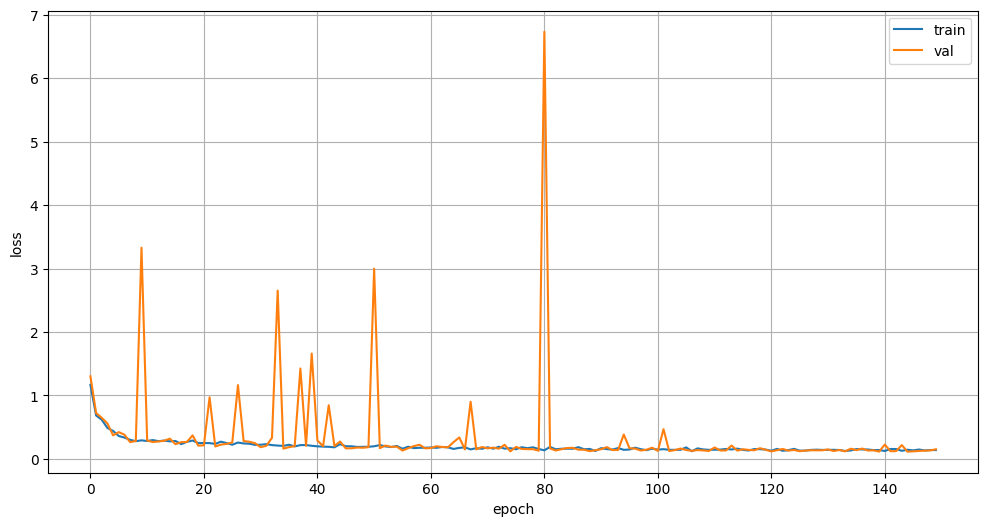

In [ ]:
# Plot validation and testing loss
plt.figure(figsize=(12,6)) # Se establece el tamaño de la gráfica.
plt.plot(history.history['loss']) # Se gráfica la pérdida del conjunto de entrenamiento a lo largo de las épocas.
plt.plot(history.history['val_loss']) # Se gráfica la pérdida con los datos de validación del entrenamiento a lo largo de las épocas.
plt.xlabel('epoch') # El eje x corresponde a las épocas.
plt.ylabel('loss') # El eje y corresponde a la pérdida.
plt.legend(['train', 'val'])  # Se añade una leyenda para distinguir entre entrenamiento y validación.
plt.grid(); # Se añade una cuadrícula a la gráfica para mejorar la legibilidad.

In [ ]:
model.summary() # Muestra un resumen del modelo.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,047,499 (385.47 MB)

 Trainable params: 33,682,179 (128.49 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 67,364,360 (256.97 MB)

In [ ]:
# Carga y prepara una imagen para el modelo
def load_and_preprocess_image(img_path, target_size=(64, 64)):
    # Carga la imagen y la redimensiona
    img = image.load_img(img_path, target_size=target_size)

    # Convierte la imagen a array numpy
    img_array = image.img_to_array(img)

    # Normaliza los valores de píxel a [0,1]
    img_array = img_array / 255.0

    # Añade dimensión del batch (el modelo espera 4D: [batch, height, width, channels])
    img_array = np.expand_dims(img_array, axis=0)

    return img_array  # Array listo para model.predict()

In [ ]:
# Función para mostrar la imagen y la predicción
def display_prediction(img_path, pred_prob, class_names):
    # Carga y muestra la imagen
    img = image.load_img(img_path, target_size=(64, 64))  # Carga redimensionando a 64x64
    plt.imshow(img)  # Muestra la imagen
    plt.axis('off')  # Oculta los ejes

    # Obtiene la clase predicha y su confianza
    pred_class = np.argmax(pred_prob)  # Índice de la clase con mayor probabilidad
    confidence = np.max(pred_prob)     # Valor de confianza (probabilidad máxima)

    # Muestra título con clase y confianza (formateado a 2 decimales)
    plt.title(f"Clase: {class_names[pred_class]}\nConfianza: {confidence:.2f}")
    plt.show()  # Renderiza la imagen final

In [ ]:
# Obtener las rutas de las imágenes a predecir (puedes modificarlo para seleccionar interactivamente)
image_path1 = "/content/drive/MyDrive/PRACTICAS LAVADO DE MANOS/Frames 2/Frames/Step2/frame_0000_24.jpg"  # Reemplaza con tu ruta
image_path2 = "/content/drive/MyDrive/PRACTICAS LAVADO DE MANOS/Frames 2/Frames/Step2/frame_0000_2.jpg"  # Reemplaza con tu ruta

# Nombres de las clases (ajusta según tus clases)
class_names = ["Step1", "Step2", "Step3"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicción para la imagen 1:


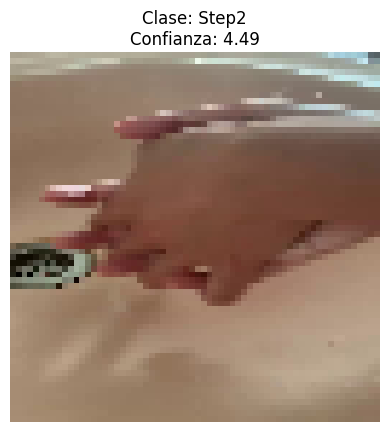

In [ ]:
# Cargar y predecir la primera imagen
from tensorflow.keras.preprocessing import image
img_array1 = load_and_preprocess_image(image_path1)
prediction1 = model.predict(img_array1)
print("Predicción para la imagen 1:")
display_prediction(image_path1, prediction1[0], class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicción para la imagen 2:


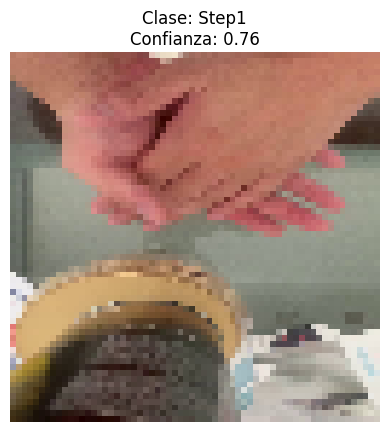

In [ ]:
# Cargar y predecir la segunda imagen
img_array2 = load_and_preprocess_image(image_path2)
prediction2 = model.predict(img_array2)
print("Predicción para la imagen 2:")
display_prediction(image_path2, prediction2[0], class_names)